# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    (optimize period)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define the periods

In [4]:
periods = range(50, 525, 25)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, sma_period=int(period))
    strategies[period].run()
    _, strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 

Summarize results

In [6]:
metrics = ('start',
           'ending_balance',
           'annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'trades_per_year',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500
start,1928-03-13,1928-04-18,1928-05-23,1928-06-28,1928-08-03,1928-09-10,1928-10-16,1928-11-21,1928-12-28,1929-02-04,1929-03-13,1929-04-18,1929-05-23,1929-06-28,1929-08-05,1929-09-10,1929-10-15,1929-11-21,1929-12-31
ending_balance,2754563.59,1774111.04,2476853.39,2639670.82,2501089.58,3616575.25,3415486.62,3612619.65,3088179.69,2374317.83,2030298.62,2384723.94,2422721.79,2204061.51,1333093.76,948335.32,830088.45,1088752.50,670898.18
annual_return_rate,6.31,5.81,6.20,6.28,6.23,6.67,6.61,6.68,6.50,6.20,6.03,6.22,6.25,6.14,5.56,5.17,5.02,5.34,4.79
max_closed_out_drawdown,-50.01,-46.25,-50.64,-45.25,-48.77,-47.00,-51.57,-59.84,-56.37,-53.04,-45.93,-47.76,-43.62,-42.98,-50.04,-47.60,-43.90,-43.39,-47.61
drawdown_annualized_return,-7.92,-7.96,-8.16,-7.20,-7.83,-7.05,-7.81,-8.96,-8.67,-8.55,-7.62,-7.68,-6.98,-7.00,-9.00,-9.20,-8.74,-8.12,-9.95
drawdown_recovery,-1.74,-0.61,-3.93,-3.75,-5.58,-5.58,-3.51,-3.58,-3.58,-3.58,-4.54,-4.56,-4.56,-4.54,-4.53,-3.12,-1.36,-1.36,-1.88
best_month,55.78,50.92,44.29,34.27,29.99,27.02,27.01,35.96,35.96,33.32,27.01,27.01,27.02,22.41,22.41,22.40,22.42,22.42,22.42
worst_month,-24.71,-29.12,-21.23,-21.23,-24.41,-29.29,-26.88,-26.62,-31.52,-27.22,-31.46,-31.46,-31.46,-31.46,-31.45,-31.46,-31.44,-31.46,-31.46
sharpe_ratio,0.59,0.54,0.57,0.57,0.56,0.60,0.59,0.60,0.59,0.56,0.55,0.56,0.56,0.55,0.51,0.48,0.47,0.50,0.45
sortino_ratio,0.60,0.55,0.58,0.58,0.57,0.61,0.60,0.62,0.62,0.58,0.55,0.57,0.57,0.56,0.51,0.48,0.47,0.51,0.46


Bar graphs

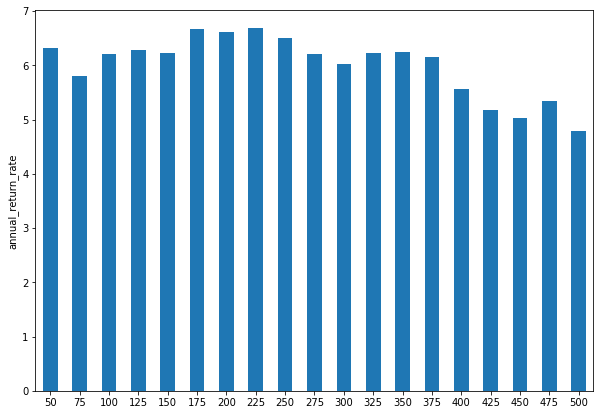

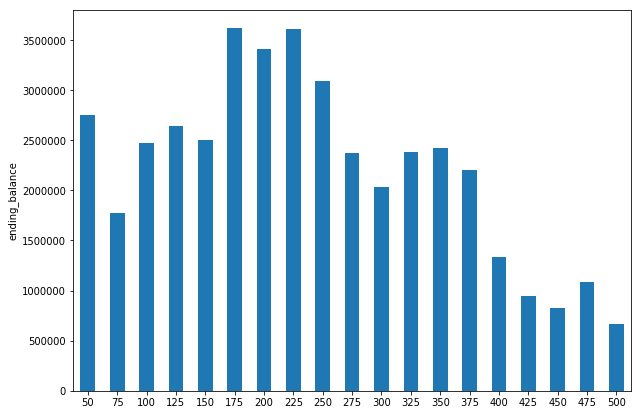

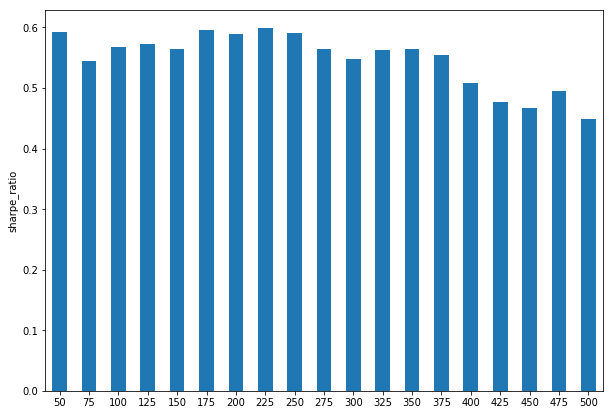

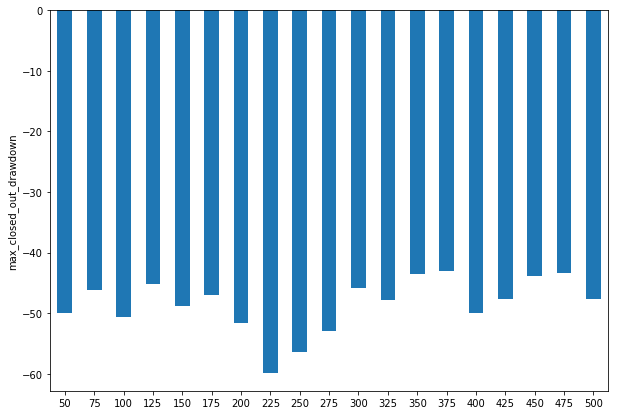

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'ending_balance')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1928-03-13 00:00:00 BUY  558 ^GSPC @ 17.92
2019-12-23 00:00:00 SELL 558 ^GSPC @ 3224.01


Equity curve

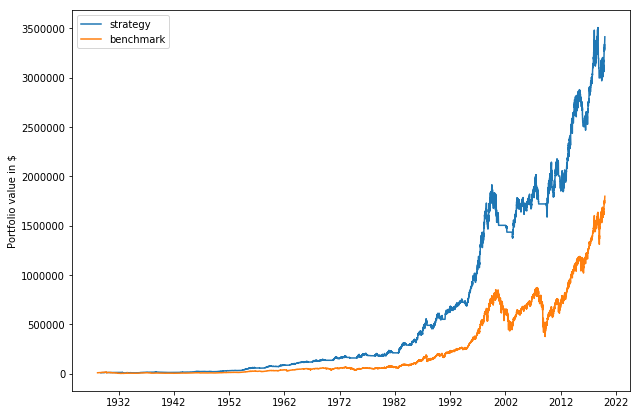

In [9]:
pf.plot_equity_curve(strategies['200'].dbal, benchmark=benchmark.dbal)